In [86]:
import cv2
import math
import sys

sys.path.append("../../")
%run ../../ac/common/images.py
%run ../../ac/common/jsons.py
%run ../../ac/visualizer/plotter.py

In [2]:
base_path = "/home/chy/labs/glass"

In [113]:
img = cv2.imread("{}/271.jpg".format(base_path))
gi = cv2.imread("{}/gi.jpg".format(base_path))
gi = gi.astype(np.float64) / 255
print(gi.shape)

(791, 1300, 3)


In [82]:
p = (10.4, 206.7, 0.0)

In [104]:
# M = np.matrix([[0.9254, -0.1737, 0.3368], 
#                [0.1631, 0.9848, 0.0593], 
#                [-0.3421, 0, 0.9396]]).astype(np.float64)
M = np.matrix([[1, 0, 0], 
               [0, 1, 0], 
               [0, 0, 1]]).astype(np.float64)

In [225]:
img.shape

(480, 640, 3)

In [209]:
def rotate_3d_in_2d_image(img, x_degree=0, y_degree=0, z_degree=0, dx=0, dy=0, dz=0, focal_dist=1):
    cos = lambda x: math.cos(x  * math.pi / 180)
    sin = lambda x: math.sin(x  * math.pi / 180)
    
    rot_x = (x_degree - 90.) * math.pi / 180.
    rot_y = (y_degree - 90.) * math.pi / 180.
    rot_z = (z_degree - 90.) * math.pi / 180.
    
    h, w = img.shape[0], img.shape[1]
    
    # projection 2D -> 3D matrix
    proj23_mat = np.matrix([
        [1, 0, -w/2],
        [0, 1, -h/2],
        [0, 0, 1],    # [0, 0, 0]이 아니지 않나?
        [0, 0, 1]])
    
    # rotation matrix each x, y, z
    rot_x_mat = np.matrix([
        [1, 0,           0,           0],
        [0, cos(rot_x), -sin(rot_x),  0],
        [0, sin(rot_x),  cos(rot_x),  0],
        [0, 0,           0,           1]])
    
    rot_y_mat = np.matrix([
        [cos(rot_y), 0, -sin(rot_y),  0],
        [0,          1,  0,           0],
        [sin(rot_y), 0,  cos(rot_y),  0],
        [0,          0,  0,           1]])

    rot_z_mat = np.matrix([
        [cos(rot_z), -sin(rot_z),  0, 0],
        [sin(rot_z),  cos(rot_z),  0, 0],
        [0,           0,           1, 0],
        [0,           0,           0, 1]])
    
    rot_mat = rot_x_mat @ rot_y_mat @ rot_z_mat
    
    # translation matrix
    t_mat = np.matrix([
        [1, 0, 0, dx],
        [0, 1, 0, dy],
        [0, 0, 1, dz],
        [0, 0, 0, 1]])
    
    # projection 3D -> 2D matrix
    f = focal_dist
    proj32_mat = np.matrix([
        [f, 0, w/2, 0],
        [0, f, h/2, 0],
        [0, 0, 1,   0]])
    
    tran_mat = proj32_mat @ t_mat @ rot_mat @ proj23_mat
    transformed_img = cv2.warpPerspective(img, tran_mat, (w, h), flags=cv2.WARP_INVERSE_MAP)
    
    return transformed_img

In [118]:
# out = cv2.warpPerspective(gi, M, (gi.shape[1], gi.shape[0]))

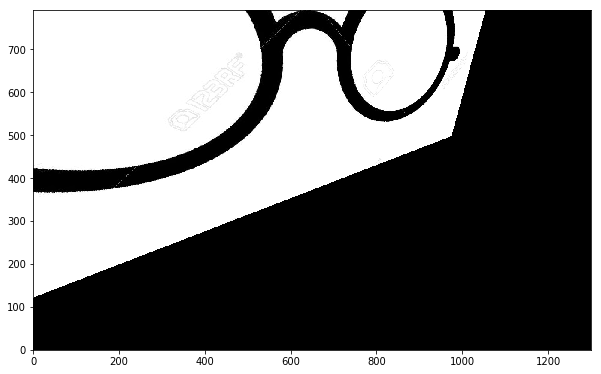

In [223]:
out = rotate_3d_in_2d_image(gi, 87, 85, 90, dy=300, focal_dist=1.2)
show_image(out)

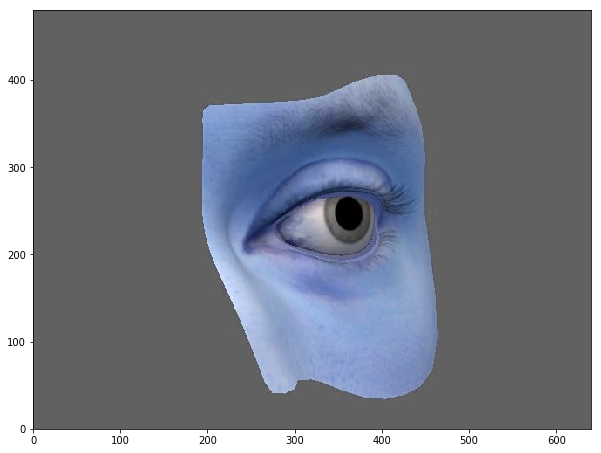

In [8]:
show_image(img)